In [1]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import random

# Load example image

In [2]:
image_path = 'D:\Internship Assignments\Auriga Tech Solutions Private Limited\images.jpeg'  
image = Image.open(image_path)

# Step 1: Resize

In [3]:
image_resized = image.resize((224, 224))

# Step 2: Normalize

In [4]:
image_array = np.array(image_resized) / 255.0

# Step 3: Data Augmentation

In [6]:
def augment_image(image):
    # Random rotation
    angle = random.uniform(-15, 15)
    image = image.rotate(angle)
    
    # Random horizontal flip
    if random.random() > 0.5:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Random zoom
    zoom_factor = random.uniform(0.8, 1.2)
    width, height = image.size
    x = int(width * zoom_factor)
    y = int(height * zoom_factor)
    image = image.resize((x, y), Image.LANCZOS)
    left = (x - width) // 2
    top = (y - height) // 2
    image = image.crop((left, top, left + width, top + height))
    
    return image

In [7]:
image_augmented = augment_image(image_resized)

C:\Users\Bhaskar Banerjee\AppData\Local\Temp\ipykernel_13892\2534888313.py:8: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  image = image.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\Bhaskar Banerjee\AppData\Local\Temp\ipykernel_13892\2534888313.py:15: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((x, y), Image.LANCZOS)


# Display images

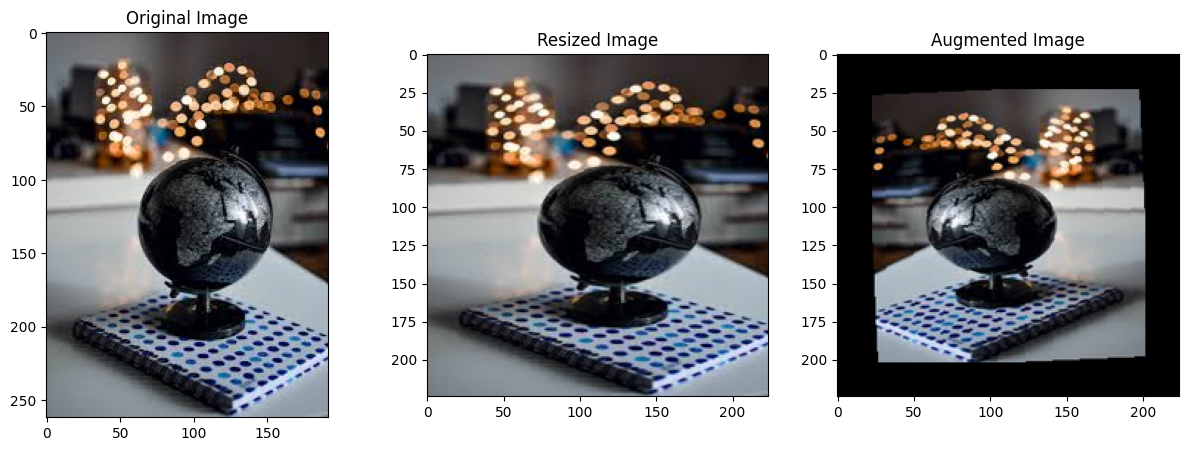

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(image_resized)
axes[1].set_title('Resized Image')
axes[2].imshow(image_augmented)
axes[2].set_title('Augmented Image')

plt.show()

In [9]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and display the original image
image = Image.open('D:\Internship Assignments\Auriga Tech Solutions Private Limited\images.jpeg')
image.show()

# Step 1: Resize
image_resized = image.resize((224, 224))
image_resized.show()

# Step 2: Normalize
image_array = np.array(image_resized)
image_normalized = image_array / 255.0

# Step 3: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming image_normalized is of shape (224, 224, 3)
image_augmented = datagen.random_transform(image_normalized)

# Convert back to image for display
image_augmented_pil = Image.fromarray((image_augmented * 255).astype('uint8'))
image_augmented_pil.show()
